In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
pip install stop_words

In [4]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [5]:
! pip install chardet
import chardet
with open('/content/tweets.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']


In [6]:
df = pd.read_csv('/content/tweets.csv', encoding=encoding)

In [7]:
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639328034676737,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639325199196160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639324683292674,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639323328540672,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639321571074048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     15000 non-null  int64  
 1   text           15000 non-null  object 
 2   favorited      15000 non-null  bool   
 3   favoriteCount  15000 non-null  int64  
 4   replyToSN      397 non-null    object 
 5   created        15000 non-null  object 
 6   truncated      15000 non-null  bool   
 7   replyToSID     369 non-null    float64
 8   id             15000 non-null  int64  
 9   replyToUID     397 non-null    float64
 10  statusSource   15000 non-null  object 
 11  screenName     15000 non-null  object 
 12  retweetCount   15000 non-null  int64  
 13  isRetweet      15000 non-null  bool   
 14  retweeted      15000 non-null  bool   
 15  longitude      4 non-null      float64
 16  latitude       4 non-null      float64
dtypes: bool(4), float64(4), int64(4), object(5)
memory

In [9]:
df.isnull().sum()


Unnamed: 0           0
text                 0
favorited            0
favoriteCount        0
replyToSN        14603
created              0
truncated            0
replyToSID       14631
id                   0
replyToUID       14603
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
longitude        14996
latitude         14996
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude'],
      dtype='object')

In [11]:
text_df=df.drop(['Unnamed: 0',  'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude'],axis=1)
text_df.head()

,text
0,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...
1,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\..."
2,saving these bingo cards for tomorrow \r\n©\r\...
3,RT @HelloBoon: Man these #AvengersEndgame ads ...
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta..."


In [12]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

RT @mrvelstan: literally nobody:
me:

#AvengersEndgame https://t.co/LR9kFwfD5c 

RT @agntecarter: i’m emotional, sorry!!

2014 x 2019
#blackwidow
#captainamerica https://t.co/xcwkCMw18w 

saving these bingo cards for tomorrow 
©
 #AvengersEndgame https://t.co/d6For0jwRb 

RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX 

RT @Marvel: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/VlPEpnXYgm 



In [13]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15000 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


In [14]:
def data_processing(text):
  text=text.lower()
  text=re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
  text=re.sub(r'[^\w\s]','',text)
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [15]:
text_df.text=text_df['text'].apply(data_processing)

In [16]:
text_df=text_df.drop_duplicates('text')

In [17]:
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data

In [18]:
text_df['text']=text_df['text'].apply(lambda x:stemming(x))

In [19]:
text_df.head()

,text
0,rt mrvelstan literally nobody avengersendgame
1,rt agntecarter im emotional sorry 2014 x 2019 ...
2,saving bingo cards tomorrow avengersendgame
3,rt helloboon man avengersendgame ads everywhere
4,rt marvel salute chrisevans captainamerica ave...


In [20]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

rt mrvelstan literally nobody avengersendgame 

rt agntecarter im emotional sorry 2014 x 2019 blackwidow captainamerica 

saving bingo cards tomorrow avengersendgame 

rt helloboon man avengersendgame ads everywhere 

rt marvel salute chrisevans captainamerica avengersendgame 



In [21]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2686 entries, 0 to 14997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2686 non-null   object
dtypes: object(1)
memory usage: 42.0+ KB


In [22]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity']=text_df['text'].apply(polarity)

In [24]:
text_df.head(10)

,text,polarity
0,rt mrvelstan literally nobody avengersendgame,0.000000
1,rt agntecarter im emotional sorry 2014 x 2019 ...,-0.250000
2,saving bingo cards tomorrow avengersendgame,0.000000
3,rt helloboon man avengersendgame ads everywhere,0.000000
4,rt marvel salute chrisevans captainamerica ave...,0.000000
5,rt mcu_direct first nonspoiler avengersendgame...,0.325758
6,rt renner4real ready rock excited avengersendg...,0.287500
7,rt avengers til end line wintersoldier avenger...,0.000000
8,rt variety avengersendgame first reactions emo...,0.116667
10,rt avengers destiny arrived josh brolin thanos...,0.000000


In [25]:
def sentiment(label):
              if label<0:
                return "Negative"
              elif label==0:
                return "Neutral"
              elif label>0:
                return "Positive"

In [26]:
text_df['sentiment']=text_df['polarity'].apply(sentiment)

In [27]:
text_df["text"]

0            rt mrvelstan literally nobody avengersendgame
1        rt agntecarter im emotional sorry 2014 x 2019 ...
2              saving bingo cards tomorrow avengersendgame
3          rt helloboon man avengersendgame ads everywhere
4        rt marvel salute chrisevans captainamerica ave...
                               ...                        
14979    im like today replace santa endgame avengersen...
14981    rt natportman_news natalie attended premiere a...
14982    long tomorrows double bill infinity war follow...
14989    ticketnew noted agreed teamu2714ufe0f u0001f38...
14997    spicinemas kindly announce approximate timings...
Name: text, Length: 2686, dtype: object

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

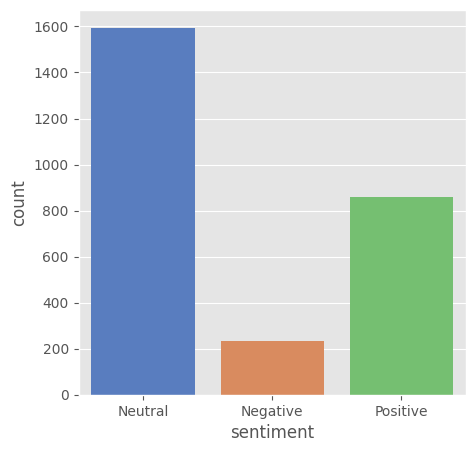

In [29]:
fig=plt.figure(figsize=(5,5))

sns.countplot(x='sentiment',data=text_df, hue='sentiment', legend=False,palette='muted')


<Axes: >

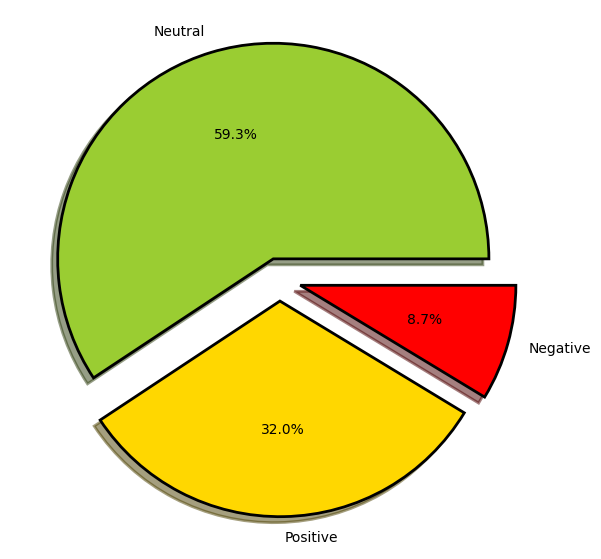

In [30]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={'linewidth':2,'edgecolor':'black'}
tags = text_df['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, wedgeprops=wp, explode=explode, label='')

In [31]:
pos_tweets=text_df[text_df.sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['polarity'],ascending=False)
pos_tweets.head(30)

,text,polarity,sentiment
11330,rt evansson_ call perfect couple evansson aven...,1.0,Positive
3307,rt noradominick aesthetic brie larson perfectl...,1.0,Positive
13196,rt drunkyrie vin diesels looks premieres alway...,1.0,Positive
1931,marvel fandom best fite avengersendgame marvel...,1.0,Positive
12421,rt anxtasia best captains avengersendgame,1.0,Positive
106,rt marvel josh brolin perfectly balanced thano...,1.0,Positive
13093,gon na best spiderman impression disappear twi...,1.0,Positive
13637,_pvrcinemas a2 captain americas best friend bu...,1.0,Positive
1106,rt _atowers best girls mcu serving real good f...,1.0,Positive
7704,rt sassymamainla absolutely perfect ending jou...,1.0,Positive


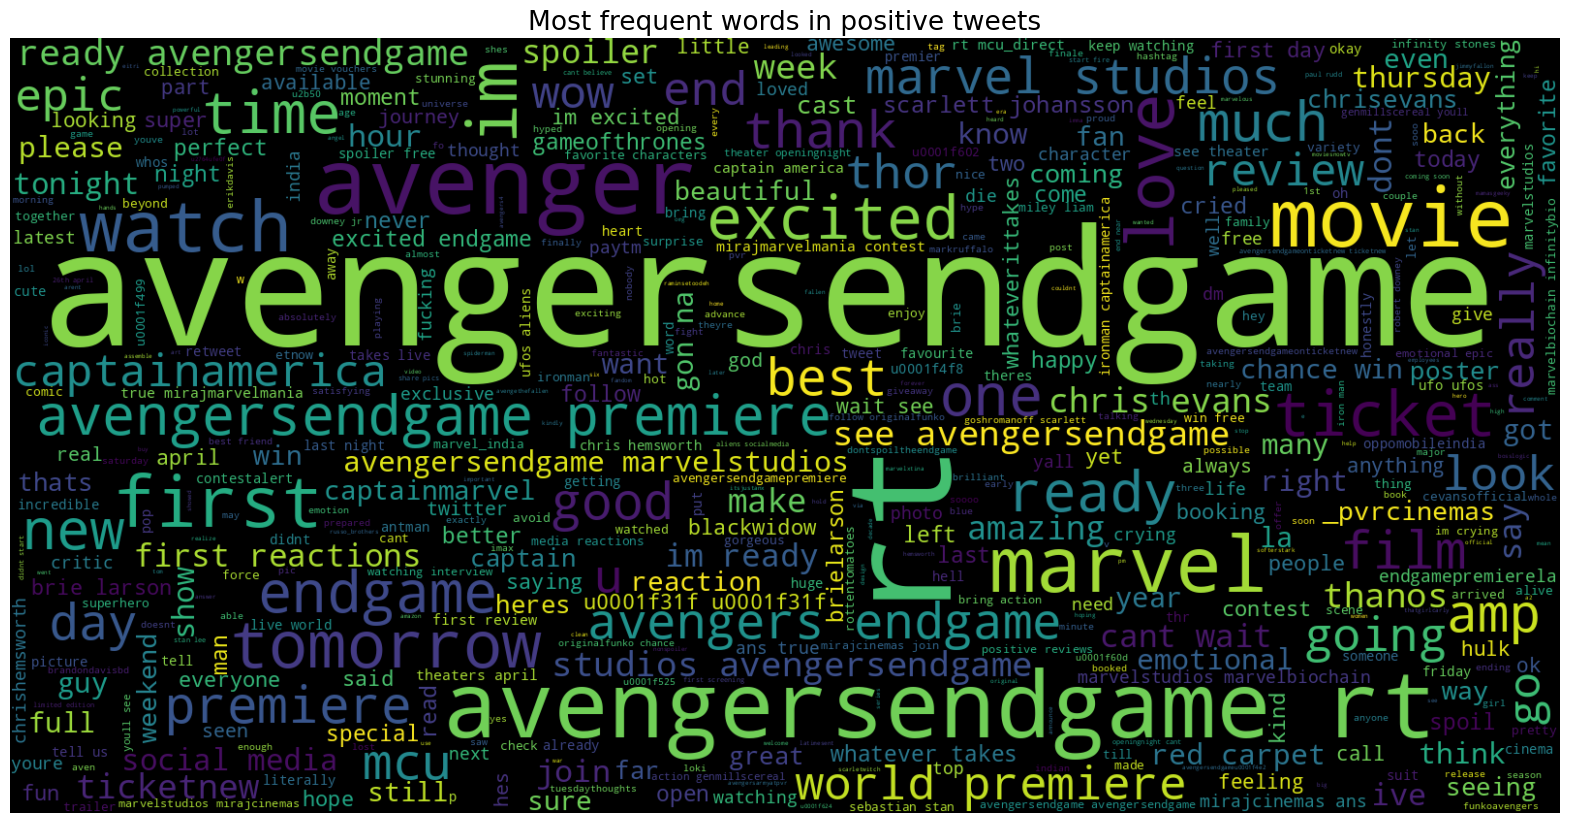

In [32]:
text=' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets',fontsize=19)
plt.show()

In [33]:
# Assuming neg_tweets is a dictionary
neg_tweets = {"text": "Some negative tweets here"}

In [34]:
neg_tweets=text_df[text_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['polarity'],ascending=False)
neg_tweets.head(30)

,text,polarity,sentiment
3912,rt shenalg dear marvel marvelstudios russo_bro...,-0.012500,Negative
321,_pvrcinemas excited watch end game waiting mov...,-0.012500,Negative
8280,rt iamaryee avengers must figure way bring bac...,-0.022222,Negative
6839,dont take grab much seems started avengersendg...,-0.025000,Negative
14982,long tomorrows double bill infinity war follow...,-0.025000,Negative
3548,hey doctor strange please time travel take fri...,-0.025000,Negative
327,natalie portman red carpet avengersendgame exc...,-0.025000,Negative
4906,rt thr long cap chrisevans arrives final aveng...,-0.025000,Negative
13310,endgame definitely watch masterpiece movie cin...,-0.025000,Negative
73,rt marvel little live entertainment taikawaiti...,-0.025568,Negative


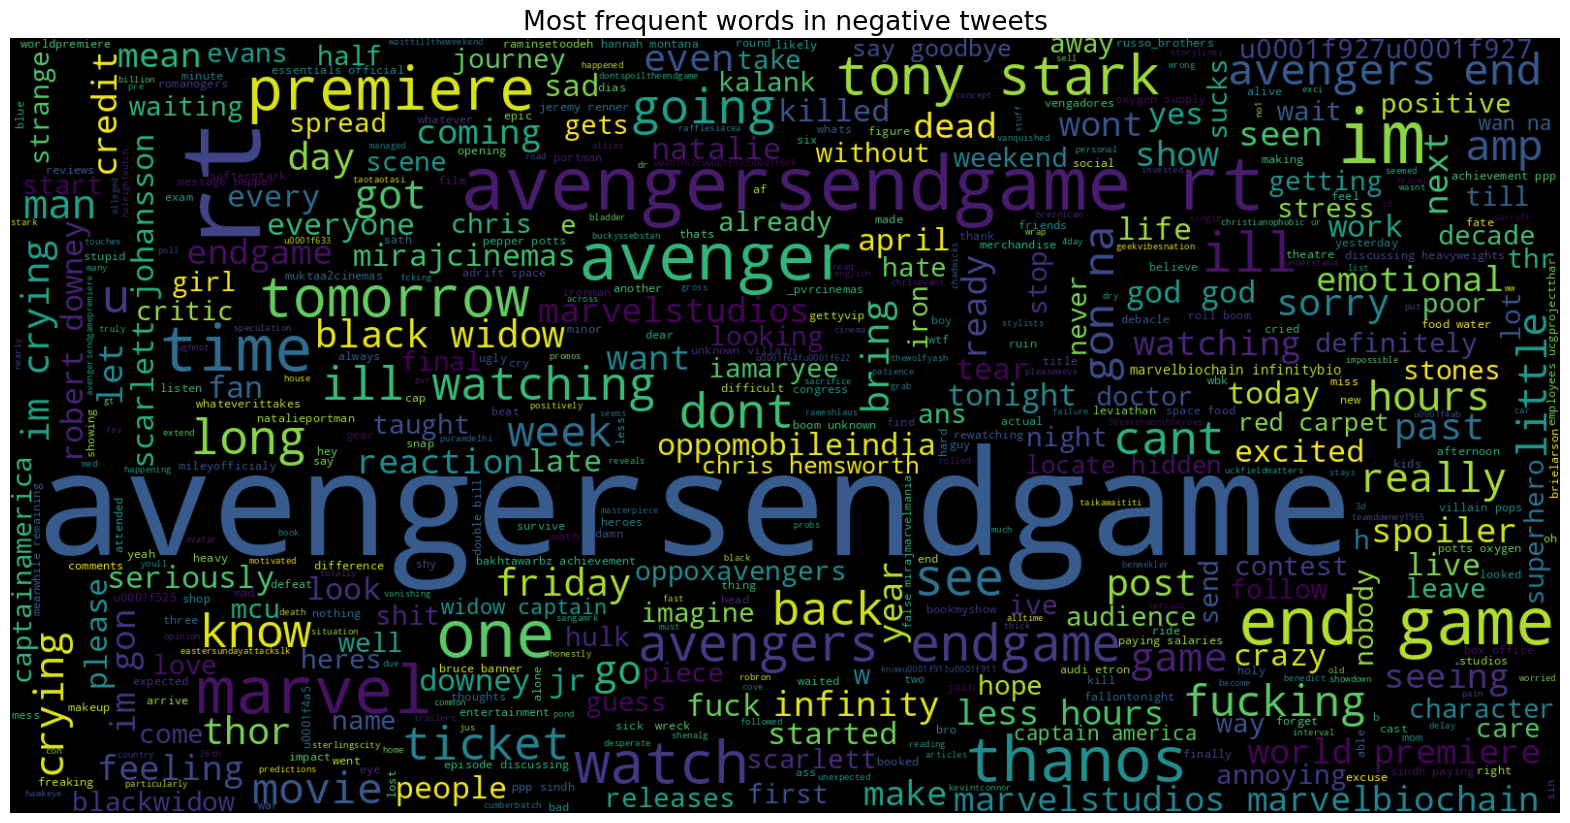

In [35]:
text = ' '.join(word for word in neg_tweets['text'])
wordcloud = WordCloud(max_words=500, width=1600, height=800, stopwords=None).generate(text)
plt.figure(figsize=(20, 15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [36]:
neutral_tweets=text_df[text_df.sentiment=='Neutral']
neutral_tweets=neutral_tweets.sort_values(['polarity'],ascending=False)
neutral_tweets[neutral_tweets.sentiment == "Neutral"]

,text,polarity,sentiment
0,rt mrvelstan literally nobody avengersendgame,0.0,Neutral
8952,im groot avengersendgame,0.0,Neutral
8916,bottom avengersendgame,0.0,Neutral
8906,rt wmqximoff captains avengersendgame,0.0,Neutral
8900,scarlett johansson avengersendgame world premi...,0.0,Neutral
...,...,...,...
3529,vanity plate though u0001f60d avengersendgame,0.0,Neutral
3521,rt bibinalexander_ oppomobileindia marvelstudi...,0.0,Neutral
3517,rt filmfare woah avengersendgame sells 1 milli...,0.0,Neutral
3514,rt katiereneelind4 im literally counting aveng...,0.0,Neutral


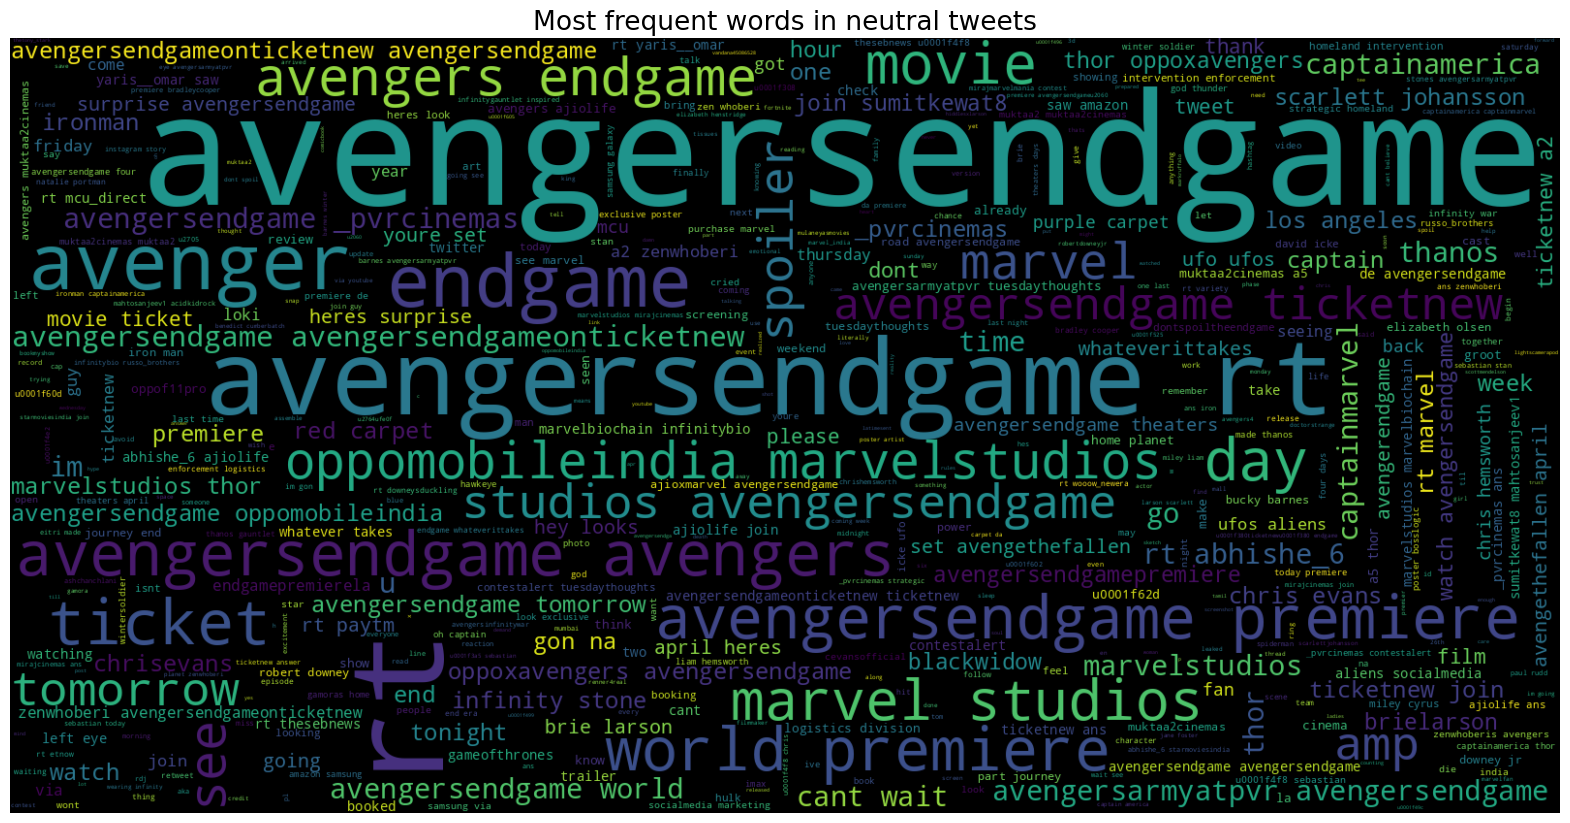

In [37]:
text = ' '.join(word for word in neutral_tweets['text'])
wordcloud = WordCloud(max_words=500, width=1600, height=800, stopwords=None).generate(text)
plt.figure(figsize=(20, 15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()